# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Setup for api calls
url = 'http://api.openweathermap.org/data/2.5/weather?'
#query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'

In [4]:
# for city in cities:
# c_data = requests.get(query_url).json()
# pprint(c_data)
city_data = []
# counter = 0
for city in cities:
    # counter = counter + 1
    # if counter % 60 == 0:
    #     time.sleep(60)
    #     print('Taking a power nap')

    query_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=imperial'
    c_data = requests.get(query_url).json()
    try:
        print(f"City {c_data['name']}  Temperture:  {c_data['main']['temp']}F Humidity: {c_data['main']['humidity']}%" +
        f" Clouds: {c_data['clouds']['all']}% Wind {c_data['wind']['speed']}mph county {c_data['sys']['country']}  date {c_data['dt']}")
        city_data.append({'City': c_data['name'],
                        'Lat': c_data['coord']['lat'],
                        'Lon': c_data['coord']['lon'],
                        'Temp': c_data['main']['temp_max'],
                        'Humidity': c_data['main']['humidity'],
                        'Cloudiness': c_data['clouds']['all'],
                        'Wind Speed': c_data['wind']['speed'],
                        'Country': c_data['sys']['country'],
                        'Date': c_data['dt']})
    except:
        print(f"Something croke {city}")


City Krasnosel'kup  Temperture:  -12.28F Humidity: 100% Clouds: 87% Wind 6.49mph county RU  date 1644089294
City Pevek  Temperture:  -28.68F Humidity: 99% Clouds: 37% Wind 3.47mph county RU  date 1644089009
City Rabo de Peixe  Temperture:  61.29F Humidity: 81% Clouds: 20% Wind 13.8mph county PT  date 1644089294
City Makakilo City  Temperture:  73.78F Humidity: 73% Clouds: 40% Wind 3.44mph county US  date 1644089295
City Ribeira Grande  Temperture:  59.4F Humidity: 88% Clouds: 75% Wind 14.97mph county PT  date 1644088835
City Uekimachi-mōno  Temperture:  33.93F Humidity: 69% Clouds: 80% Wind 8.23mph county JP  date 1644089295
City Mataura  Temperture:  51.48F Humidity: 92% Clouds: 100% Wind 1.07mph county NZ  date 1644088987
City Ponta do Sol  Temperture:  67.96F Humidity: 49% Clouds: 0% Wind 10.65mph county PT  date 1644089062
City Kaitangata  Temperture:  47.7F Humidity: 82% Clouds: 79% Wind 5.37mph county NZ  date 1644089296
City Kalmunai  Temperture:  75.16F Humidity: 78% Clouds: 68

In [36]:
#pprint(city_data)
city_df = pd.DataFrame(city_data)
#pd.set_option('display.max_rows', 150)
city_df.to_csv(index=False)
city_df

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Río Gallegos,-51.6226,-69.2181,66.25,37,75,16.11,AR,1643831111
1,Busselton,-33.6500,115.3333,67.05,49,100,15.10,AU,1643831111
2,Tateyama,34.9833,139.8667,37.42,53,39,8.72,JP,1643831111
3,Manali,13.1667,80.2667,77.07,75,9,5.86,IN,1643831112
4,Kapaa,22.0752,-159.3190,74.48,71,0,6.91,US,1643831112
...,...,...,...,...,...,...,...,...,...
571,Siparia,10.1333,-61.5000,87.66,87,10,4.00,TT,1643831289
572,Svoge,42.9667,23.3500,33.04,88,100,3.22,BG,1643831289
573,Riyadh,24.6877,46.7219,55.54,35,0,5.66,SA,1643831124
574,Neuquén,-38.9516,-68.0591,93.09,21,40,9.22,AR,1643831290


In [37]:
# print(f"City {c_data['name']}  Temperture:  {c_data['main']['temp']}F Humidity: {c_data['main']['humidity']}%" +
#         f" Clouds: {c_data['clouds']['all']}% Wind {c_data['wind']['speed']}mph")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
city_df.to_csv("Output/city_data.csv", index=False, header=True)
city_df.head()

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Río Gallegos,-51.6226,-69.2181,66.25,37,75,16.11,AR,1643831111
1,Busselton,-33.6500,115.3333,67.05,49,100,15.10,AU,1643831111
2,Tateyama,34.9833,139.8667,37.42,53,39,8.72,JP,1643831111
3,Manali,13.1667,80.2667,77.07,75,9,5.86,IN,1643831112
4,Kapaa,22.0752,-159.3190,74.48,71,0,6.91,US,1643831112


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#  Get the indices of cities that have humidity over 100%.


In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

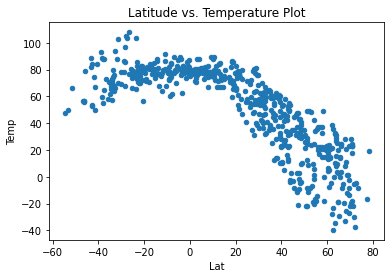

In [63]:
ax1 = city_df.plot.scatter(x='Lat', y='Temp')
ax1.title.set_text('Latitude vs. Temperature Plot')

## Latitude vs. Humidity Plot

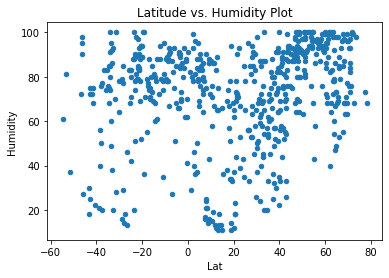

In [64]:
ax1 = city_df.plot.scatter(x='Lat', y='Humidity')
ax1.title.set_text('Latitude vs. Humidity Plot')

## Latitude vs. Cloudiness Plot

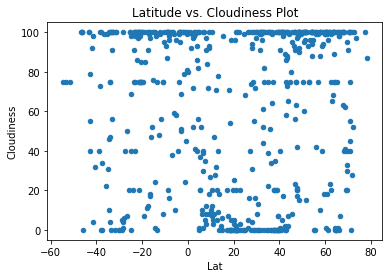

In [65]:
ax1 = city_df.plot.scatter(x='Lat', y='Cloudiness')
ax1.title.set_text('Latitude vs. Cloudiness Plot')

## Latitude vs. Wind Speed Plot

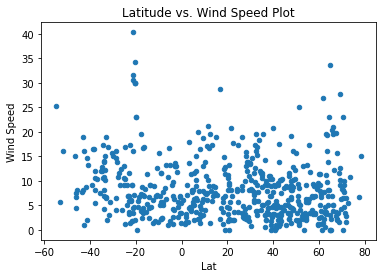

In [66]:
ax1 = city_df.plot.scatter(x='Lat', y='Wind Speed')
ax1.title.set_text('Latitude vs. Wind Speed Plot')

## Linear Regression

In [78]:
# Probably don't need this
# lat_df = city_df.set_index('Lat')
# lat_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

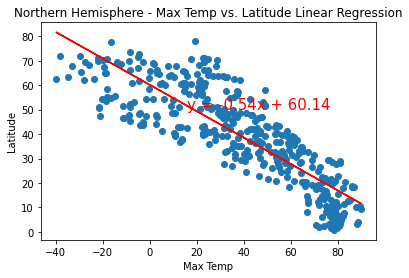

In [79]:
n_lat_df = city_df.loc[city_df['Lat'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,50),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

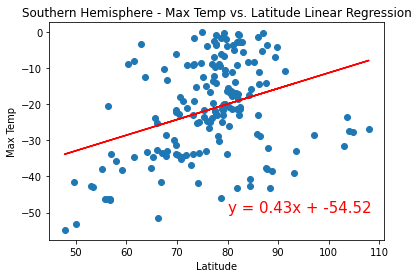

In [69]:
s_lat_df = city_df.loc[city_df['Lat'] < 0]
# s_lat_df
y_values = s_lat_df['Lat']
x_values = s_lat_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,-50),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

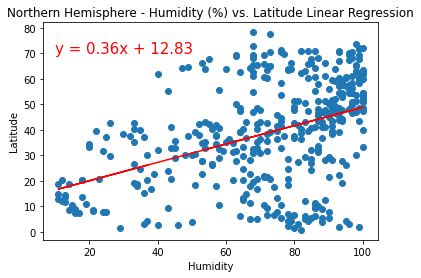

In [70]:
n_lath_df = city_df.loc[city_df['Humidity'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,70),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

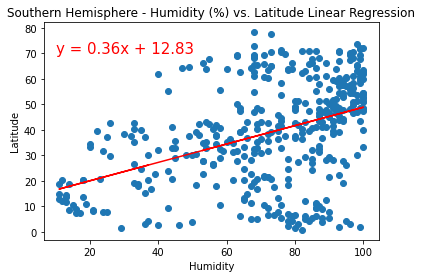

In [71]:
s_lath_df = city_df.loc[city_df['Humidity'] < 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,70),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

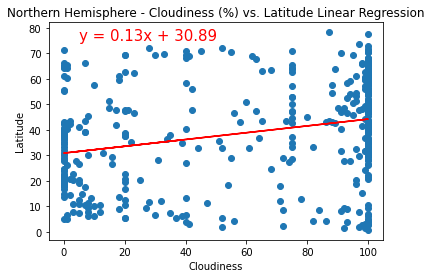

In [73]:
n_latc_df = city_df.loc[city_df['Cloudiness'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

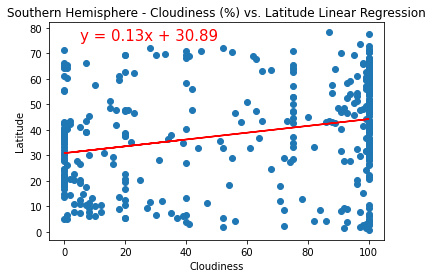

In [74]:
s_latc_df = city_df.loc[city_df['Cloudiness'] < 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,75),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

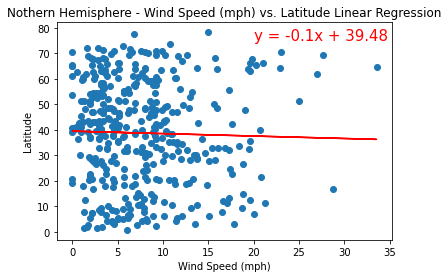

In [77]:
n_lats_df = city_df.loc[city_df['Wind Speed'] > 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Nothern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

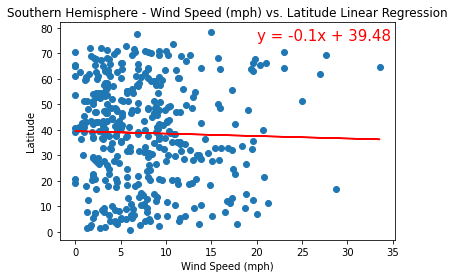

In [76]:
s_lats_df = city_df.loc[city_df['Wind Speed'] < 0]
y_values = n_lat_df['Lat']
x_values = n_lat_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,75),fontsize=15,color="red")
plt.show()